In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data loading and preparing

In [285]:
data = pd.read_csv('./dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022.csv', index_col="accident_index")
data.head()

,status,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
accident_index,,,,,,,,,,,,,,,,,,,
2022070151244,Unvalidated,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
2022070152668,Unvalidated,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2022070154696,Unvalidated,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
2022070154696,Unvalidated,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
2022070154696,Unvalidated,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [286]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61352 entries, 2022070151244 to 2022461159841
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_year                       61352 non-null  int64 
 2   accident_reference                  61352 non-null  object
 3   vehicle_reference                   61352 non-null  int64 
 4   casualty_reference                  61352 non-null  int64 
 5   casualty_class                      61352 non-null  int64 
 6   sex_of_casualty                     61352 non-null  int64 
 7   age_of_casualty                     61352 non-null  int64 
 8   age_band_of_casualty                61352 non-null  int64 
 9   casualty_severity                   61352 non-null  int64 
 10  pedestrian_location                 61352 non-null  int64 
 11  pedestrian_movement                 613

# EDA

## status

In [287]:
data['status'].unique()

array(['Unvalidated'], dtype=object)

Every value in "status" column, is "Unvalidated".
So this column has nothing to tell and we can drop it.

In [288]:
data = data.drop(['status'], axis=1)

## accident_year

In [289]:
data.accident_year.unique()

array([2022], dtype=int64)

Every value in "accident_year" column, is "2022".
So this column has nothing to tell and we can drop it.

In [290]:
data = data.drop(['accident_year'], axis=1)

## accident_reference

In [291]:
data.accident_reference.unique()
# no problem with unique values
data.accident_reference.nunique()
# there is 48283 kind of values in this column

# trying to turn it to numeric tyupe
for value in data.accident_reference:
    try:
        float(value)
    except:
        print(value)
        break

170H10152


this column is a kind of code.
the nunique id too large to decode it.
it's almost different for every column.
so we refuse using it, because there is no information in this column.

In [292]:
data = data.drop(['accident_reference'], axis=1)

## vehicle_reference

In [293]:
data.vehicle_reference.unique()
# 277 and 61 should be checked

array([  2,   1,   3,   4,   5,   8,   6,   9, 227,   7,  61], dtype=int64)

In [294]:
data[ (data.vehicle_reference == 61) | (data.vehicle_reference == 227) ] 
# they are outlier data

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
accident_index,,,,,,,,,,,,,,,,
2022311153207,227,1,3,2,14,3,3,1,3,0,0,0,0,1,2,E01013947
2022311214493,61,1,1,1,21,5,3,0,0,0,0,0,3,2,8,E01028032


In [295]:
# turning this outliers values to None
vehicle_ref_outliers = data[ (data.vehicle_reference == 61) | (data.vehicle_reference == 227) ].index
for item in vehicle_ref_outliers:
    data.loc[item, 'vehicle_reference'] = None

<Axes: xlabel='vehicle_reference', ylabel='Count'>

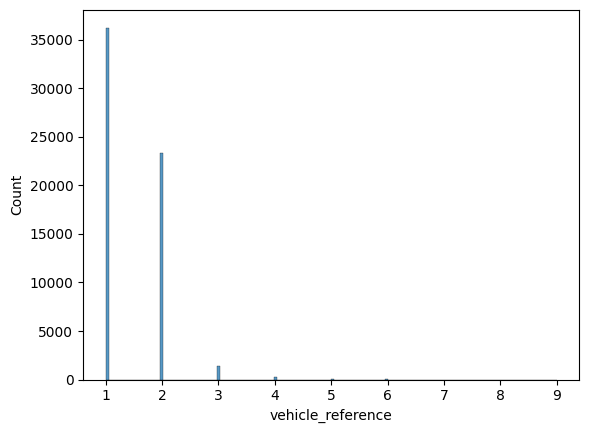

In [296]:
sns.histplot(data.vehicle_reference)

In [297]:
# the Frequency of 1 and 2 is huge
# but for the other values its really low
# so we consider them as others 
# we turn their values to -1 
data.loc[data.vehicle_reference > 2, 'vehicle_reference'] = -1

## casualty_reference

In [298]:
data['casualty_reference'].unique() 
# 22 and 148 should be checked
data[(data['casualty_reference'] == 22) | (data['casualty_reference'] == 148)]
# they are outlier data

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
accident_index,,,,,,,,,,,,,,,,
2022231137324,1.0,22,2,1,24,5,3,0,0,1,0,0,9,1,6,E01009278
2022302200086,2.0,148,1,2,21,5,3,0,0,0,0,0,3,1,3,E01013471


In [299]:
# turning this outliers values to None
casualty_ref_outliers = data[ (data.casualty_reference == 22) | (data.casualty_reference == 148) ].index
for item in casualty_ref_outliers:
    data.loc[item, 'casualty_reference'] = None

<Axes: xlabel='casualty_reference', ylabel='Count'>

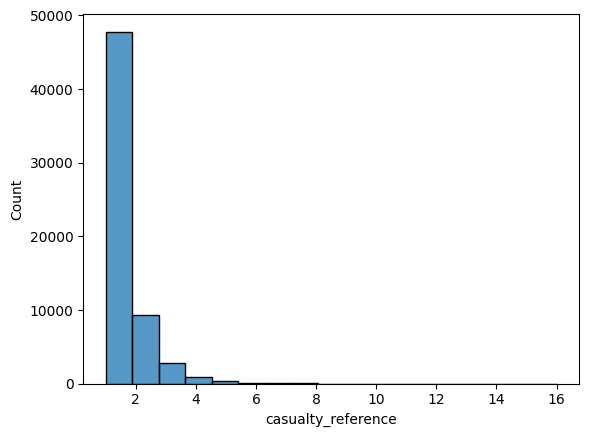

In [300]:
sns.histplot(data.casualty_reference)

In [301]:
# a huge part of dataset is about 1 and 2 as casualty_reference
# so we consider the rest as others (-1)
data.loc[data['casualty_reference'] > 2, 'casualty_reference'] = -1

## casualty_class

In [302]:
data.casualty_class.unique()
# no problem with unique values

array([1, 2, 3], dtype=int64)

<Axes: xlabel='casualty_class', ylabel='Count'>

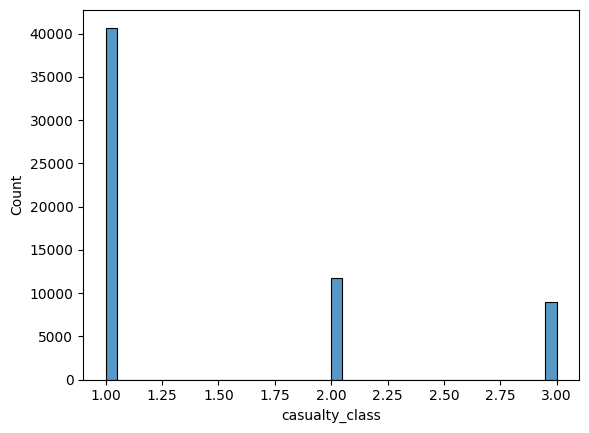

In [303]:
sns.histplot(data.casualty_class)
# a huge part of dataset is about class 1

In [304]:
data.sex_of_casualty.unique()
# no pattern detected in unique

array([ 2,  1, -1,  9], dtype=int64)

<Axes: xlabel='sex_of_casualty', ylabel='Count'>

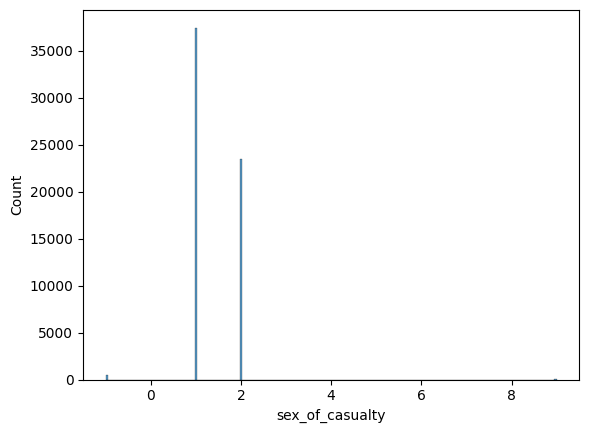

In [305]:
sns.histplot(data.sex_of_casualty)
# considering -1 and 9 as outliers

In [306]:
# turning this outliers values to None
sex_of_casualty_outliers = data[ (data.sex_of_casualty == -1) | (data.sex_of_casualty == 9) ].index
for item in sex_of_casualty_outliers:
    data.loc[item, 'sex_of_casualty'] = None

## age_of_casualty

In [307]:
data.age_of_casualty.unique()
# no problem with unique values
data.age_band_of_casualty.nunique()
# no problem with nunique values

12

<Axes: xlabel='age_of_casualty', ylabel='Count'>

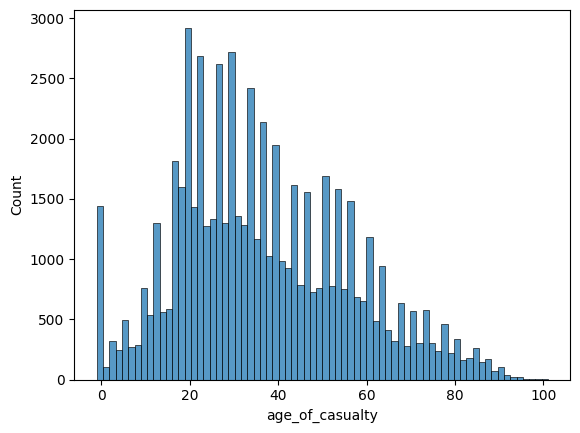

In [308]:
sns.histplot(data.age_of_casualty)
# there is a big bar for -1 
# and its not following the bell shape

In [309]:
data[data.age_of_casualty < 0]
# probable -1 is for null data 
# becuase it has a huge part in dataset
# and age can not be a negative value

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
accident_index,,,,,,,,,,,,,,,,
2022161138447,1.0,1.0,1,NaN,-1,-1,3,0,0,0,0,0,3,-1,-1,-1
2022141135113,1.0,1.0,2,1.0,-1,-1,3,0,0,0,2,0,11,2,3,E01019807
2022201179119,2.0,1.0,1,1.0,-1,-1,3,0,0,0,0,0,9,-1,-1,-1
2022201179119,2.0,2.0,2,1.0,-1,-1,3,0,0,1,0,0,9,-1,-1,-1
2022201179619,1.0,1.0,3,1.0,-1,-1,3,4,1,0,0,2,0,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022411142703,2.0,1.0,1,NaN,-1,-1,3,0,0,0,0,0,9,-1,-1,-1
2022201168992,2.0,-1.0,2,1.0,-1,-1,3,0,0,1,0,0,9,1,8,E01009794
2022411146070,2.0,-1.0,2,2.0,-1,-1,3,0,0,-1,0,0,9,1,4,E01023330


In [310]:
# turning -1 to None
null_age_of_casualty = data[ (data.age_of_casualty == -1)].index
for item in null_age_of_casualty:
    data.loc[item, 'age_of_casualty'] = None

## age_band_of_casualty

In [311]:
data.age_band_of_casualty.unique
# every thing ok but -1 in values

<bound method Series.unique of accident_index
2022070151244     8
2022070152668     6
2022070154696     9
2022070154696    11
2022070154696     9
                 ..
2022461156711     9
2022461157243     3
2022461157256     7
2022461157316     7
2022461159841    10
Name: age_band_of_casualty, Length: 61352, dtype: int64>

<Axes: xlabel='age_band_of_casualty', ylabel='Count'>

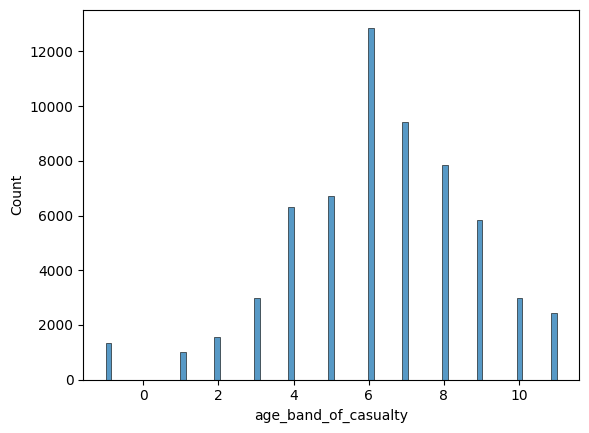

In [312]:
sns.histplot(data.age_band_of_casualty)
# a complete bell plot exept for 1 values 

In [313]:
# turning -1 to None
null_age_band_of_casualty = data[ (data.age_band_of_casualty == -1)].index
for item in null_age_band_of_casualty:
    data.loc[item, 'age_band_of_casualty'] = None

## casualty_severity

In [314]:
data.casualty_severity.unique()
# no problem with unique values
data.casualty_severity.nunique()
# no problem with nunique value

3

<Axes: xlabel='casualty_severity', ylabel='Count'>

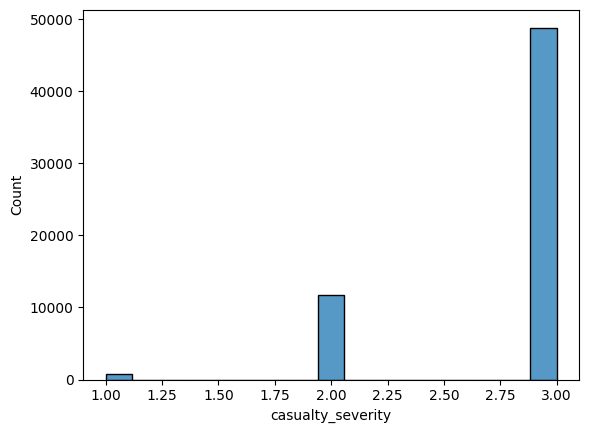

In [315]:
sns.histplot(data.casualty_severity)
# a huge part of dataset is about 3rd degree

In [316]:
(data[data.casualty_severity == 1].__len__() / len(data)) * 100
# 1.2% of accidents has casualty_severity as 1 so we drop this rows
data = data.drop(data[data.casualty_severity == 1].index)

## pedestrian_location

In [317]:
data.pedestrian_location.unique()
# no problem with unique values

array([ 0,  5, 10,  9,  6,  8,  1,  4,  7,  3,  2], dtype=int64)

<Axes: xlabel='pedestrian_location', ylabel='Count'>

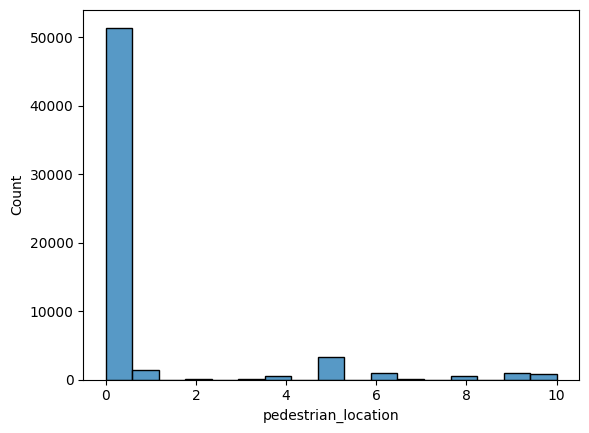

In [318]:
sns.histplot(data.pedestrian_location)

In [319]:
data[data.pedestrian_location == 0].__len__() / len(data)
# 85% of dataset has 0 as pedestrian_location
# so we can consider all of them as 0 
# infact we can drop this column
data = data.drop(['pedestrian_location'], axis=1)

## pedestrian_movement

In [320]:
data.pedestrian_movement.unique()
# no problem with unique values

array([0, 2, 9, 8, 3, 1, 7, 5, 4, 6], dtype=int64)

<Axes: xlabel='pedestrian_movement', ylabel='Count'>

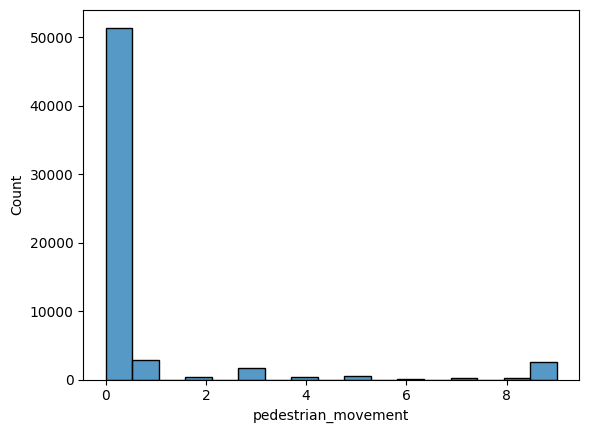

In [321]:
sns.histplot(data.pedestrian_movement)

In [322]:
data[data.pedestrian_movement == 0].__len__() / len(data)
# 85% of dataset has 0 as pedestrian_movement
# so we can consider all of them as 0 
# infact we can drop this column
data = data.drop(['pedestrian_movement'], axis=1)

## car_passenger

In [323]:
data.car_passenger.unique()
# no pattern detected in unique values

array([ 0,  2,  1, -1,  9], dtype=int64)

<Axes: xlabel='car_passenger', ylabel='Count'>

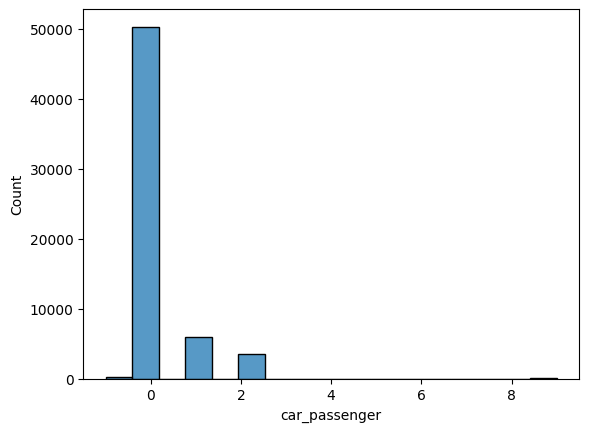

In [324]:
sns.histplot(data.car_passenger)

In [325]:
data[data.car_passenger == 0].__len__() / len(data)
# 83% of dataset has 0 as pedestrian_movement
# so we can consider all of them as 0 
# infact we can drop this column
data = data.drop(['car_passenger'], axis=1)

## bus_or_coach_passenger

In [326]:
data.bus_or_coach_passenger.unique()
# no pattern detected in unique values

array([ 0,  2,  4,  1,  3, -1,  9], dtype=int64)

<Axes: xlabel='bus_or_coach_passenger', ylabel='Count'>

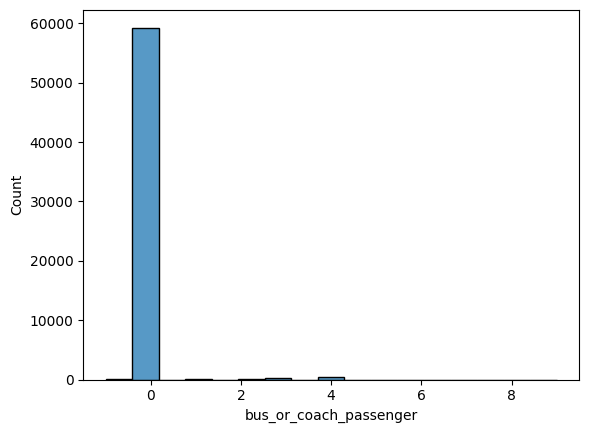

In [327]:
sns.histplot(data.bus_or_coach_passenger)

In [328]:
data[data.bus_or_coach_passenger == 0].__len__() / len(data)
# 98% of dataset has 0 as pedestrian_movement
# so we can consider all of them as 0 
# infact we can drop this column
data = data.drop(['bus_or_coach_passenger'], axis=1)

## pedestrian_road_maintenance_worker

In [329]:
data.pedestrian_road_maintenance_worker.unique()
# no problem with unique values

array([ 0,  2,  1, -1], dtype=int64)

<Axes: xlabel='pedestrian_road_maintenance_worker', ylabel='Count'>

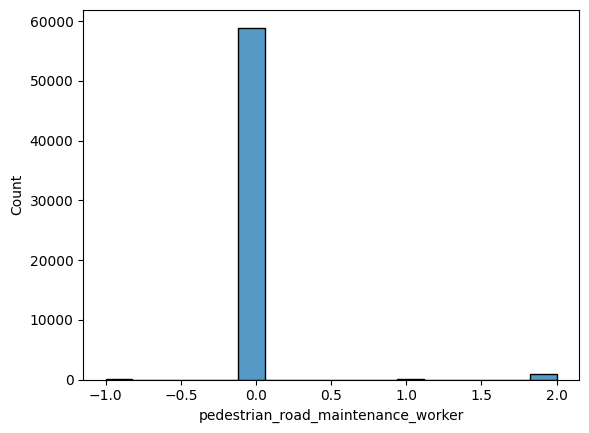

In [330]:
sns.histplot(data.pedestrian_road_maintenance_worker)

In [331]:
data[data.pedestrian_road_maintenance_worker == 0].__len__() / len(data)
# 98% of dataset has 0 as pedestrian_road_maintenance_worker
# so we can consider all of them as 0 
# infact we can drop this column
data = data.drop(['pedestrian_road_maintenance_worker'], axis=1)

## casualty_type

In [332]:
data.casualty_type.unique() 

array([ 9,  1,  0, 20,  2,  3, 17,  5,  4, 11, 98, 97, 90,  8, 19, 21, 23,
       22, 10, 16, 18, -1], dtype=int64)

<Axes: xlabel='casualty_type', ylabel='Count'>

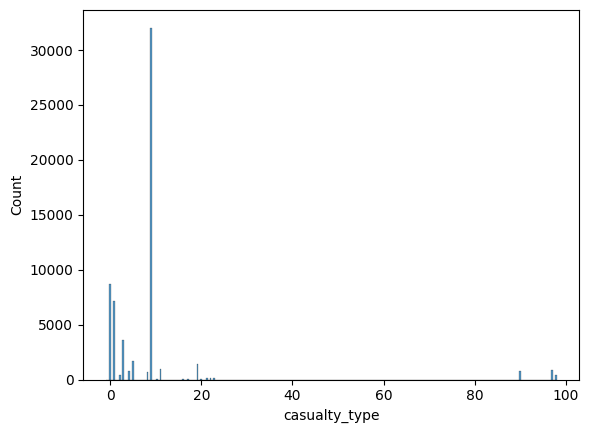

In [333]:
sns.histplot(data.casualty_type)
# the plot is not clear

In [334]:
# defining a loop to caclulate Frequency
for value in sorted(data.casualty_type.unique()) :
    print(value, ':', end='')
    precent = (len(data[data.casualty_type == value]) / len(data)) * 100
    print(precent)
# there ary many values with a very small percentage
# so we consider them as 'others' with -1 value



-1 :0.008312966565248475
0 :14.534390742680433
1 :11.829351422348578
2 :0.6733502917851264
3 :5.986998520291952
4 :1.3433753969441535
5 :2.8147704789931334
8 :1.1422016060651403
9 :53.26782715679917
10 :0.15628377142667133
11 :1.612715513658204
16 :0.056528172643689624
17 :0.04987779939149084
18 :0.0066503732521987794
19 :2.325968044956523
20 :0.11638153191347864
21 :0.2676775234010009
22 :0.17457229787021797
23 :0.20782416413121185
90 :1.351688363509402
97 :1.3932531963356443
98 :0.6800006650373253


In [335]:
# defining a loop to consider every column with small precent for casualty_type
for value in sorted(data.casualty_type.unique()) :
    precent = (len(data[data.casualty_type == value]) / len(data)) * 100
    if precent < 10 :
        data.loc[data['casualty_type'] == value, 'casualty_type'] = -1

## casualty_home_area_type

In [336]:
data.casualty_home_area_type.unique()
# no probmlem with unique values

array([ 1,  2,  3, -1], dtype=int64)

<Axes: xlabel='casualty_home_area_type', ylabel='Count'>

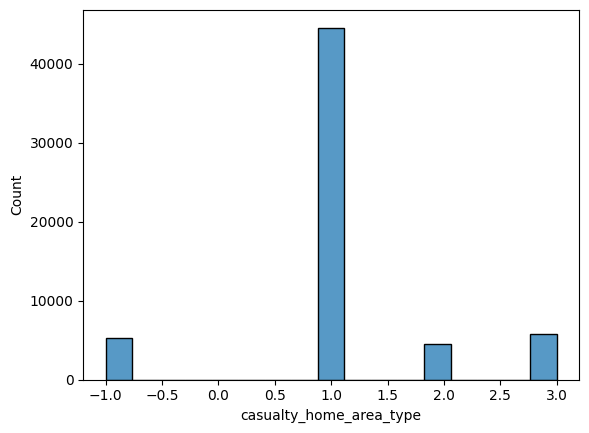

In [337]:
sns.histplot(data.casualty_home_area_type)

In [338]:
data[data.casualty_home_area_type == 1].__len__() / len(data)
# 74% of dataset has 1 as casualty_home_area_type value
# so we consider others as -1 (means others) 

0.7410012136931186

In [339]:
data.loc[data['casualty_home_area_type']!=1, 'casualty_home_area_type'] = -1

## casualty_imd_decile

In [340]:
data.casualty_imd_decile.unique()
# no problem with unique values

array([ 9,  2, 10,  7, -1,  5,  8,  3,  4,  1,  6], dtype=int64)

<Axes: xlabel='casualty_imd_decile', ylabel='Count'>

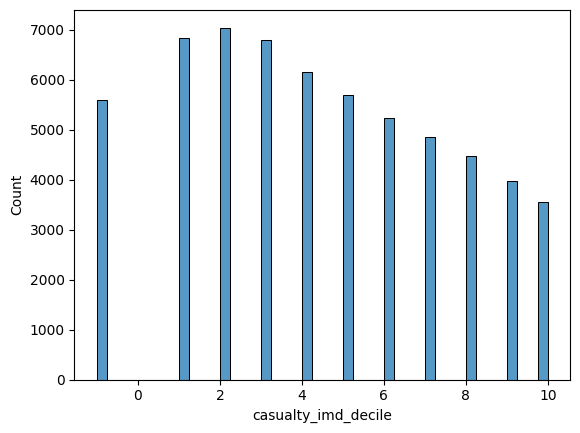

In [341]:
sns.histplot(data.casualty_imd_decile)
# every thing ok
# we dont know if -1 meaning null values
# so we do not change it 

## lsoa_of_casualty

In [342]:
data.lsoa_of_casualty.unique()
# nothing to get from unique values
data.lsoa_of_casualty.nunique()
# the nuniuge is a huge number

# this column is a kind of code 
# its not unique for every rows
# so we keep it becuase it can be used in classification

23624

# Analyzing

In [343]:
df = data.drop(['lsoa_of_casualty'], axis=1)
# make copy of data without non-numeric column

## Corellation

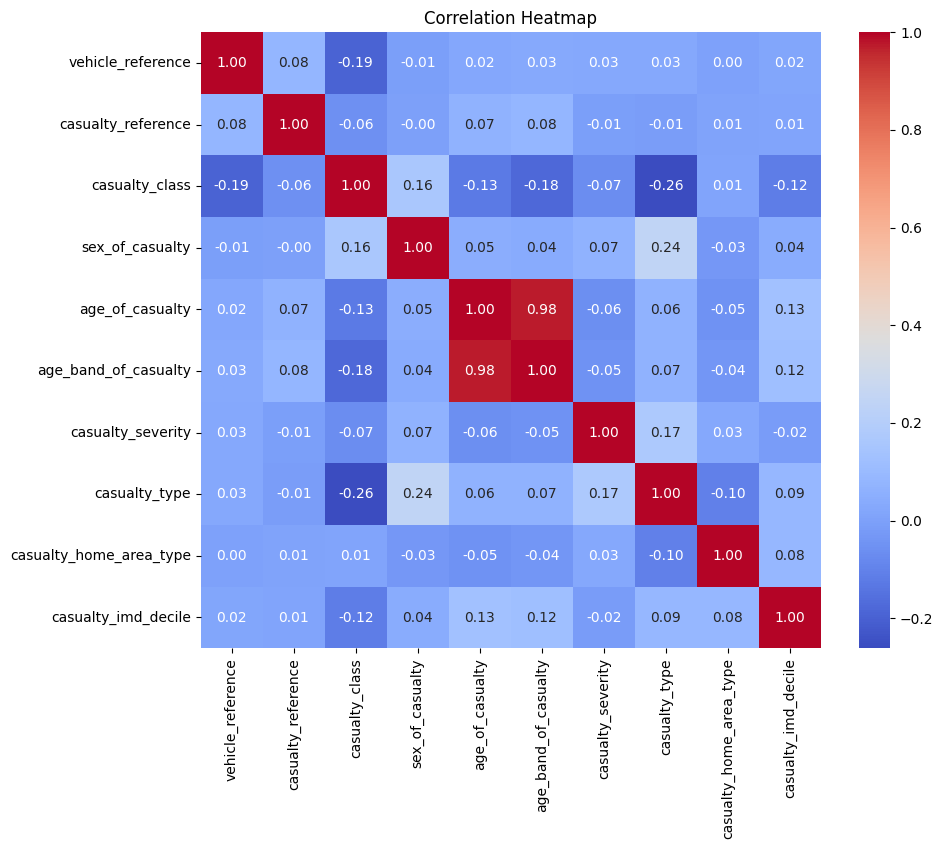

In [344]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [345]:
df = df.drop(['age_of_casualty'], axis=1)
# the correlation of age_of_casualty and age_band_of_casualty is huge
# we keep age_band_of_casualty beacuse age_of_casualty has unnecessary details

## vehicle refrence 

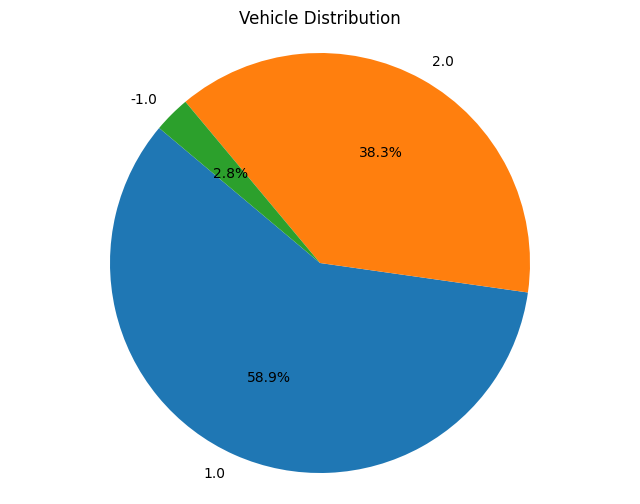

In [346]:
# Count the occurrences of each vehicle_reference
vehicle_counts = df['vehicle_reference'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(vehicle_counts, labels=vehicle_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Vehicle Distribution')
plt.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## casualty_reference

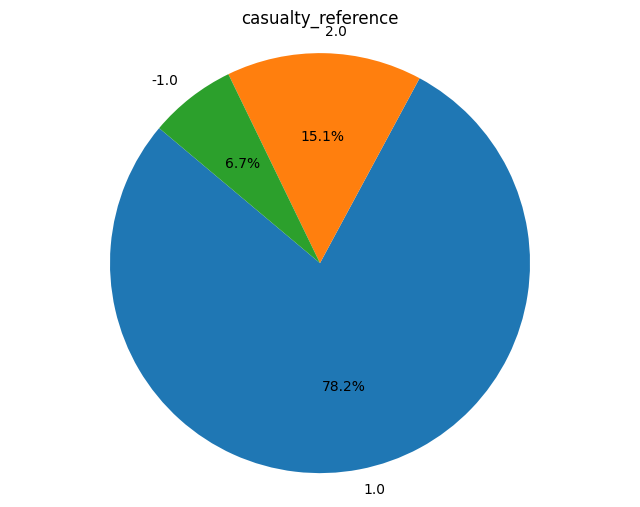

In [350]:
# Count the occurrences of each casualty_reference
casualty_reference_counts = df['casualty_reference'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(casualty_reference_counts, labels=casualty_reference_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('casualty_reference')
plt.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## age_band_of_casualty

<Axes: xlabel='age_band_of_casualty', ylabel='Count'>

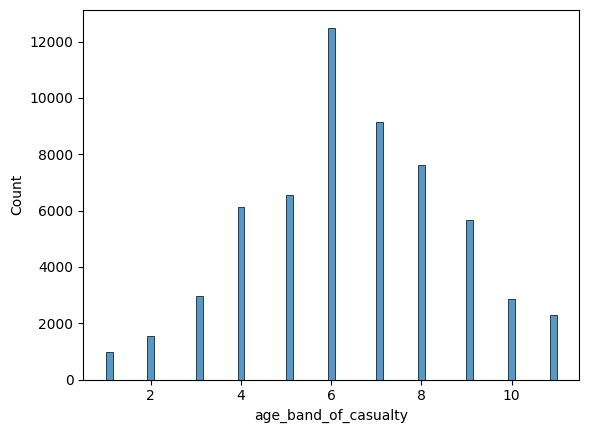

In [351]:
sns.histplot(data.age_band_of_casualty)
# Normal distribution to the right

## sex_of_casualty

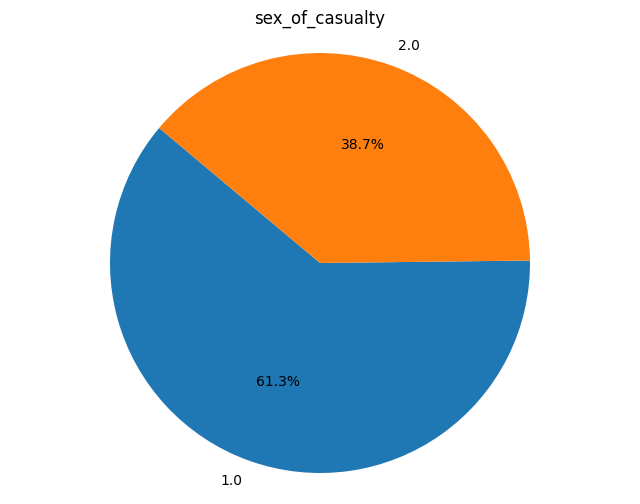

In [357]:
# Count the occurrences of each sex_of_casualty
sex_of_casualty_counts = df['sex_of_casualty'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_of_casualty_counts, labels=sex_of_casualty_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('sex_of_casualty')
plt.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## casualty_severity

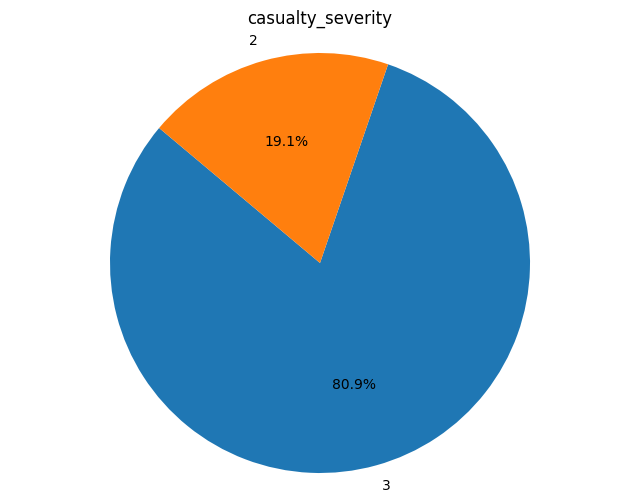

In [361]:
# Count the occurrences of each sex_of_casualty
casualty_severity_counts = df['casualty_severity'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(casualty_severity_counts, labels=casualty_severity_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('casualty_severity')
plt.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

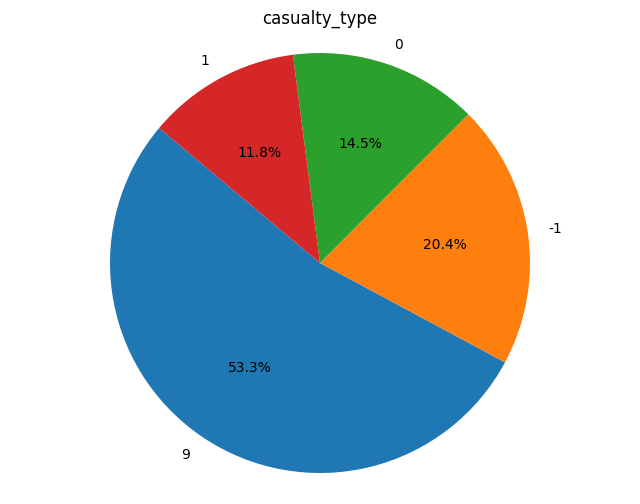

In [365]:
# Count the occurrences of each casualty_type
casualty_type_counts = df['casualty_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(casualty_type_counts, labels=casualty_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('casualty_type')
plt.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## casualty_home_area_type

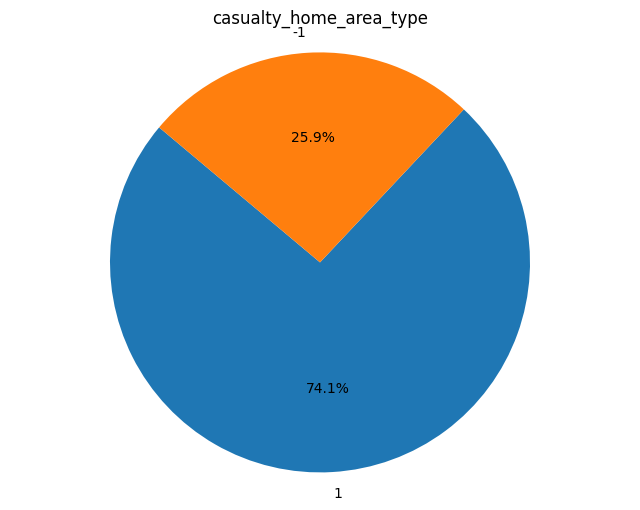

In [371]:
# Count the occurrences of each casualty_home_area_type
casualty_home_area_type_counts = df['casualty_home_area_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(casualty_home_area_type_counts, labels=casualty_home_area_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('casualty_home_area_type')
plt.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## casualty_imd_decile

<Axes: xlabel='casualty_imd_decile', ylabel='Count'>

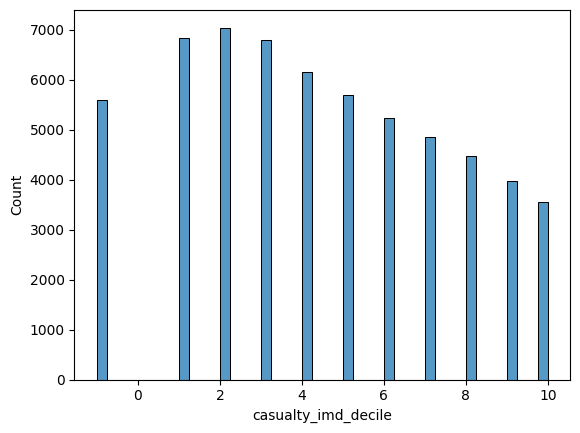

In [377]:
sns.histplot(df.casualty_imd_decile)